# Import software libraries and load the dataset #

In [450]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
- NumPy 1.25.2
- pandas 2.0.3
- Matplotlib 3.7.2
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [451]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Examine a general summary of statistics

In [452]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Identify outliers

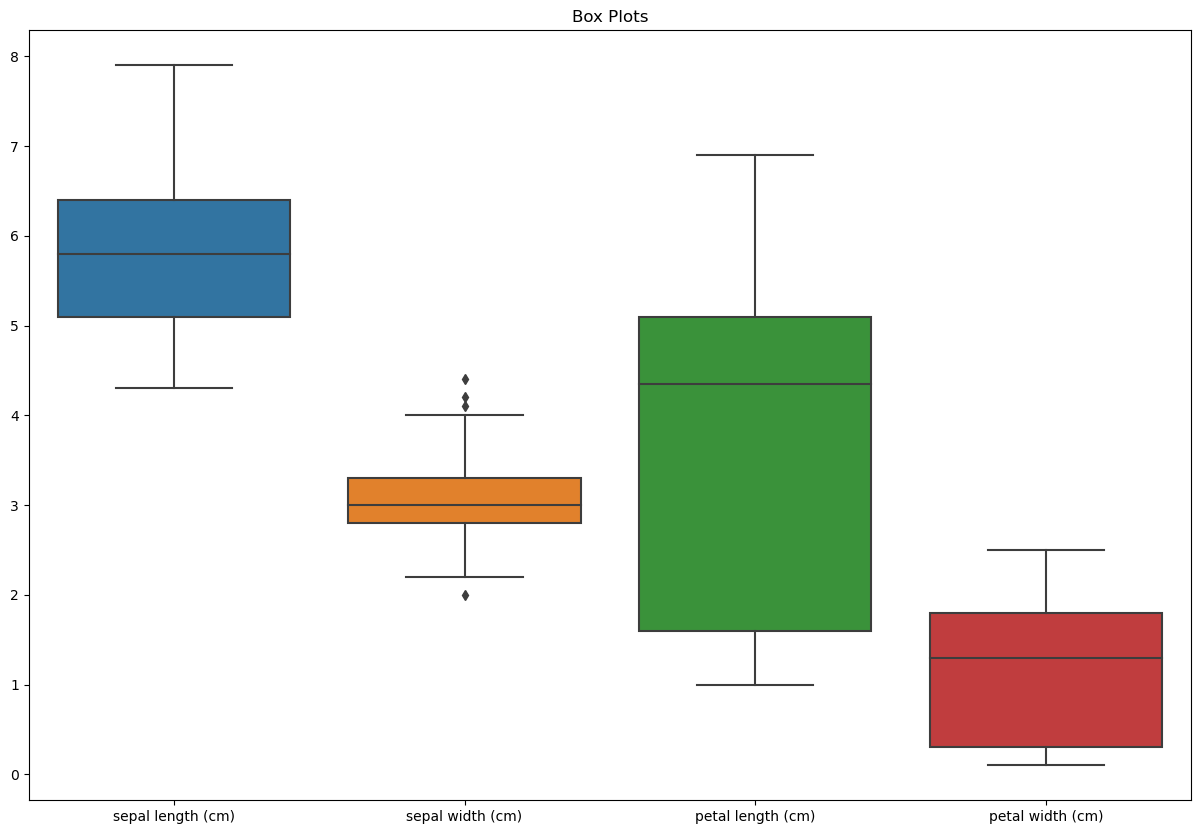

In [454]:
data = [df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], df['petal width (cm)']]

labels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [455]:
df.drop(df[(df['target'] == 2)].index, inplace = True)

In [456]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

In [457]:
px.scatter_3d(df,x = df['petal length (cm)'] ,y = df['sepal width (cm)'],z=df['target'])

# Plot a decision boundary for a given model

# Train a basic logistic regression model and plot its decision boundary

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [459]:
x = df.loc[:,['sepal length (cm)', 'sepal width (cm)']]
y = df.loc[:,['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('test is :', y_test.count(),'train is :', y_train.count())

test is : target    20
dtype: int64 train is : target    80
dtype: int64


In [460]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/Users/abdullah/anaconda3/envs/Data_Analysis/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [461]:
score = logreg.score(x_train, y_train)
print(score)
score = logreg.score(x_test, y_test)
print(score)

1.0
1.0


<Axes: xlabel='sepal length (cm)', ylabel='target'>

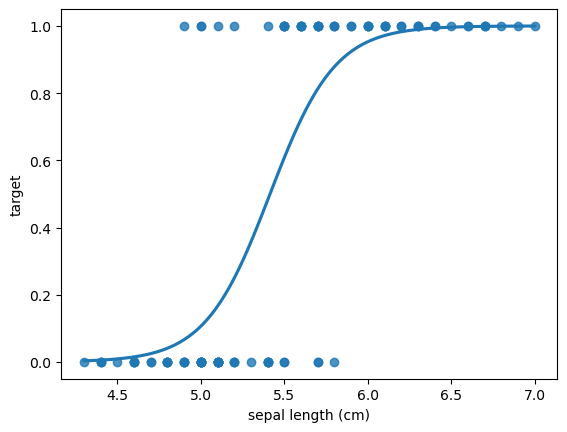

In [462]:
x = df['sepal length (cm)']
y = df['target']
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<Axes: xlabel='sepal width (cm)', ylabel='target'>

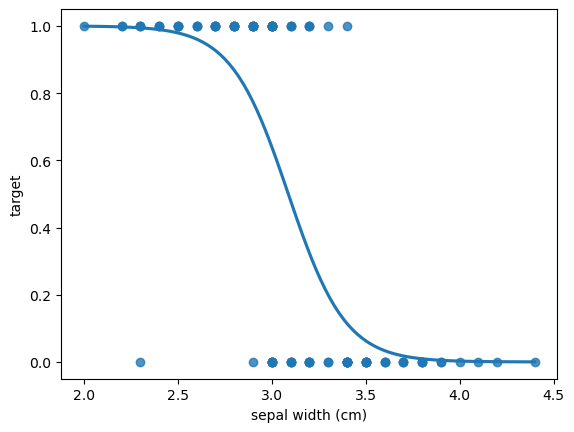

In [463]:
x = df['sepal width (cm)']
y = df['target']
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [464]:
from sklearn.svm import SVC

In [465]:
x = df.loc[:,['sepal length (cm)', 'sepal width (cm)']]
y = df.loc[:,['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('test is :', y_test.count(),'train is :', y_train.count())

test is : target    20
dtype: int64 train is : target    80
dtype: int64


In [466]:
model = SVC(kernel='linear' ,C=100)
model.fit(x_train, y_train)

/Users/abdullah/anaconda3/envs/Data_Analysis/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=100, kernel='linear')

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

In [469]:
model= SVC(kernel='linear' ,C=0.1)
model.fit(x_train, y_train)

/Users/abdullah/anaconda3/envs/Data_Analysis/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=0.1, kernel='linear')

# Split the datasets

In [468]:
x = df.loc[:,['sepal length (cm)', 'sepal width (cm)']]
y = df.loc[:,['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('test is :', y_test.count(),'train is :', y_train.count())

test is : target    20
dtype: int64 train is : target    80
dtype: int64


# Evaluate an SVM model using a holdout test set

In [470]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

